The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of
faces. Each image is flattened to a 1D vector of size 4,096. 40 different people
were photographed (10 times each), and the usual task is to train a model that
can predict which person is represented in each picture. Load the dataset using
the sklearn.datasets.fetch_olivetti_faces() function, then split it into a
training set, a validation set, and a test set (note that the dataset is already scaled
between 0 and 1). Since the dataset is quite small, you probably want to use stratified
sampling to ensure that there are the same number of images per person in
each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).
Visualize the clusters: do you see similar faces in each cluster?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_olivetti_faces

df = fetch_olivetti_faces()

In [3]:
X, y = df['data'], df['target']

In [9]:
X.shape, y.shape

((400, 4096), (400,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val)

In [13]:
X_train.shape, X_val.shape, X_test.shape

((280, 4096), (60, 4096), (60, 4096))

In [25]:
from sklearn.cluster import KMeans

models = []
for n in range(1, 150):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_train)
    models.append(kmeans)

In [27]:
from sklearn.metrics import silhouette_score

silhouettes = []
inertias = []
for model in models:
    # silhouettes.append(silhouette_score(X_train, model.labels_))
    inertias.append(model.inertia_)

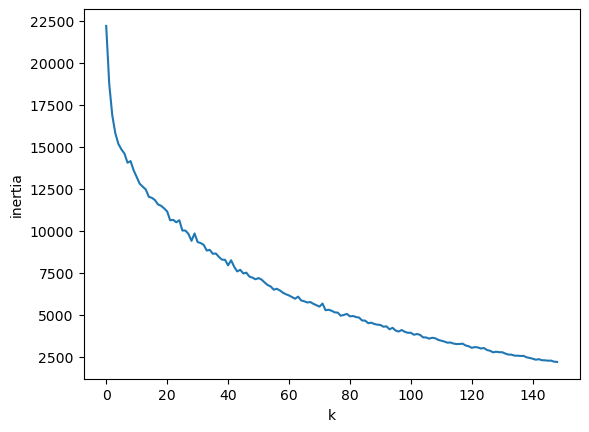

In [30]:
plt.plot(inertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

Cluster 0


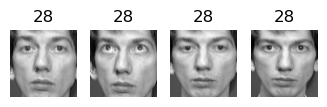

Cluster 1


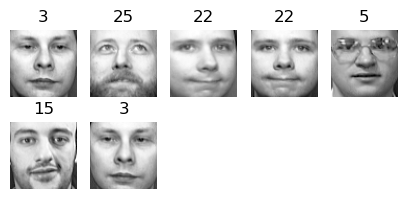

Cluster 2


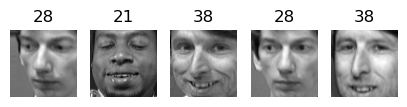

Cluster 3


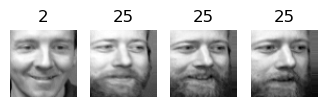

Cluster 4


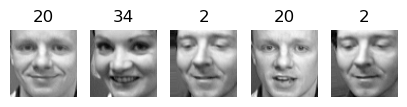

Cluster 5


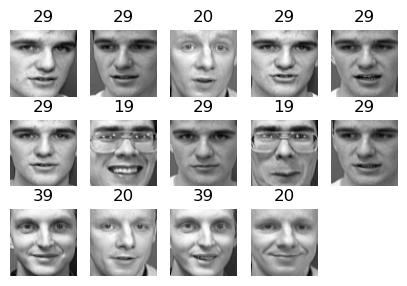

Cluster 6


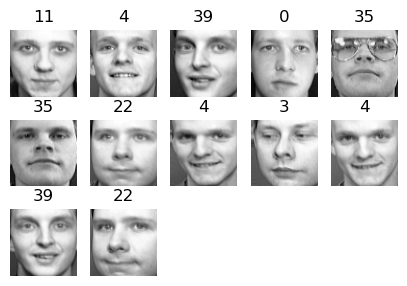

Cluster 7


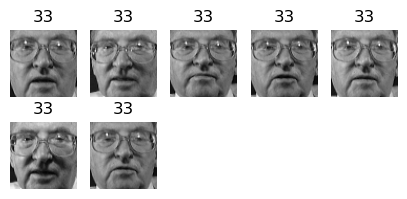

Cluster 8


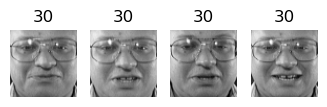

Cluster 9


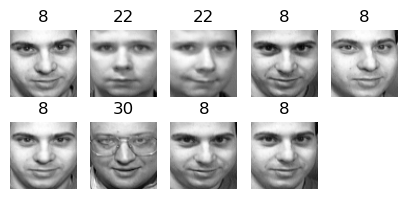

Cluster 10


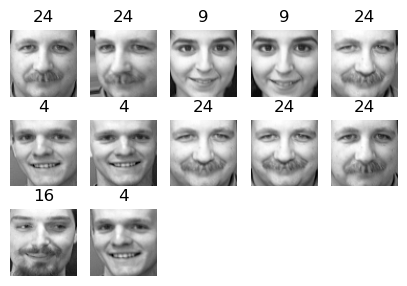

Cluster 11


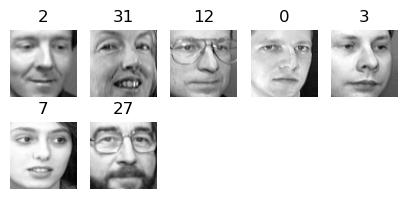

Cluster 12


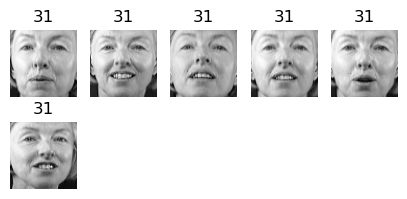

Cluster 13


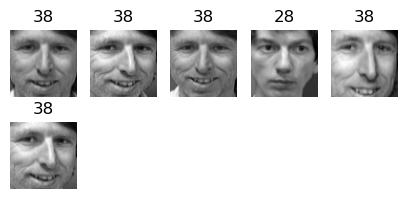

Cluster 14


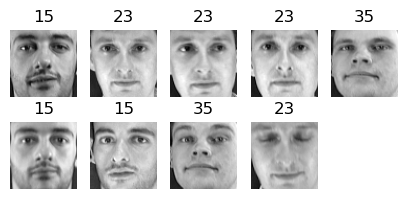

Cluster 15


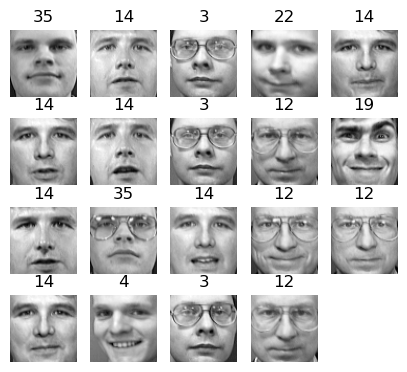

Cluster 16


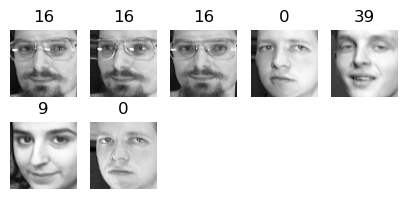

Cluster 17


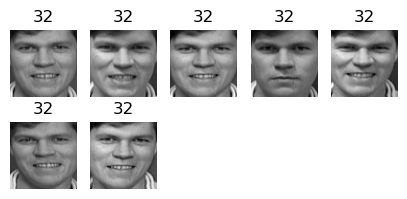

Cluster 18


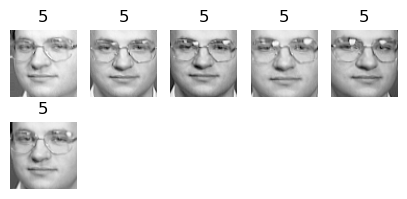

Cluster 19


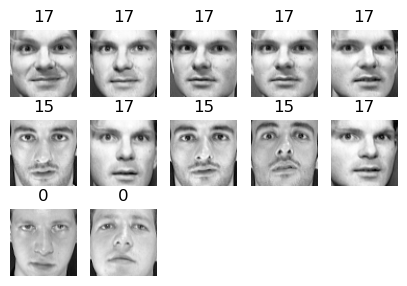

Cluster 20


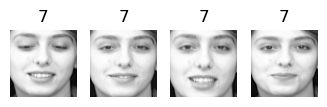

Cluster 21


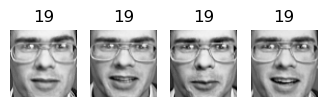

Cluster 22


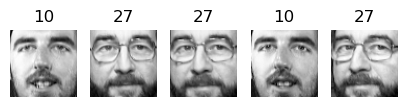

Cluster 23


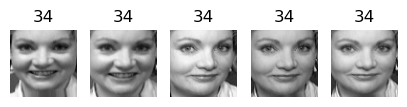

Cluster 24


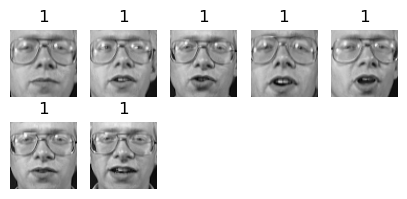

Cluster 25


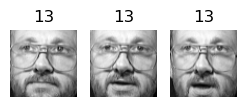

Cluster 26


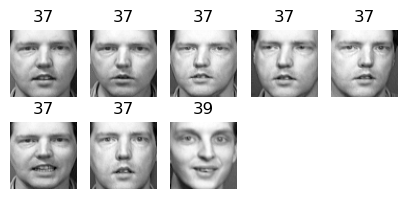

Cluster 27


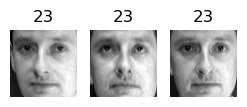

Cluster 28


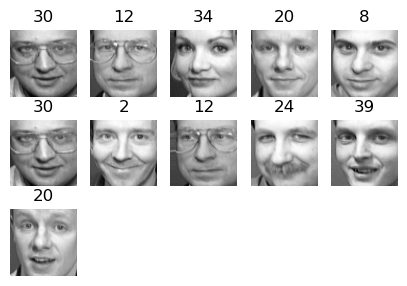

Cluster 29


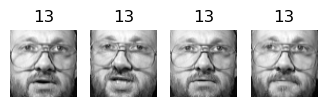

Cluster 30


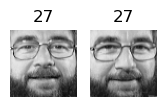

Cluster 31


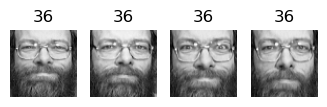

Cluster 32


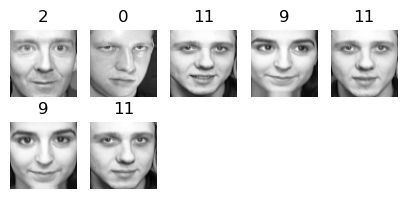

Cluster 33


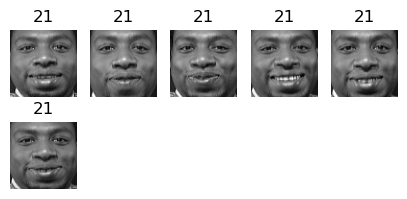

Cluster 34


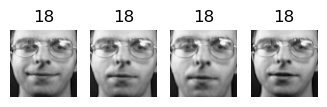

Cluster 35


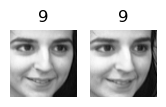

Cluster 36


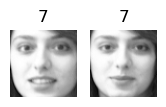

Cluster 37


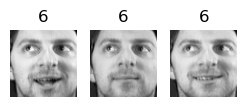

Cluster 38


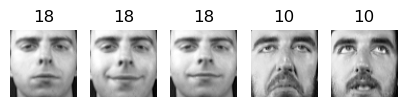

Cluster 39


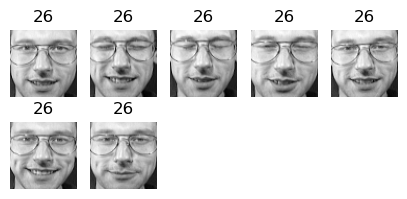

Cluster 40


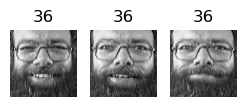

Cluster 41


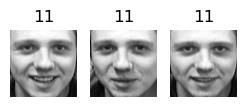

Cluster 42


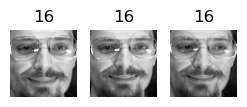

Cluster 43


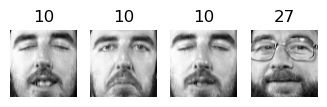

Cluster 44


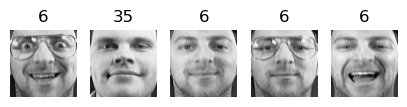

Cluster 45


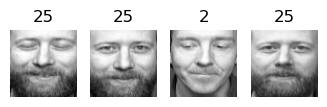

In [37]:
best_model = models[45]

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Continuing with the Olivetti faces dataset, train a classifier to predict which person
is represented in each picture, and evaluate it on the validation set. Next, use
K-Means as a dimensionality reduction tool, and train a classifier on the reduced
set. Search for the number of clusters that allows the classifier to get the best performance:
what performance can you reach? What if you append the features
from the reduced set to the original features (again, searching for the best number
of clusters)?

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

accuracy_score(y_val, forest.predict(X_val)), balanced_accuracy_score(y_val, forest.predict(X_val))

(0.9666666666666667, 0.975)

In [42]:
X_train_reduced = models[50].transform(X_train)
X_val_reduced = models[50].transform(X_val)
X_test_reduced = models[50].transform(X_test)

forest = RandomForestClassifier()
forest.fit(X_train_reduced, y_train)

forest.score(X_val_reduced, y_val)

0.7833333333333333

In [44]:
from sklearn.pipeline import Pipeline

for n in range(1, 150):
    pipe = Pipeline([
        ('kmeans', KMeans(n_clusters=n)),
         ('forest', RandomForestClassifier())
    ])
    pipe.fit(X_train, y_train)
    print(n, pipe.score(X_val, y_val))

1 0.08333333333333333
2 0.3
3 0.43333333333333335
4 0.6
5 0.6333333333333333
6 0.6333333333333333
7 0.6166666666666667
8 0.6333333333333333
9 0.6833333333333333
10 0.6
11 0.7
12 0.7333333333333333
13 0.6833333333333333
14 0.65
15 0.7166666666666667
16 0.8
17 0.7333333333333333
18 0.8
19 0.7166666666666667
20 0.8
21 0.6833333333333333
22 0.7666666666666667
23 0.8166666666666667
24 0.75
25 0.7166666666666667
26 0.8333333333333334
27 0.8
28 0.75
29 0.7833333333333333
30 0.8333333333333334
31 0.7833333333333333
32 0.7666666666666667
33 0.8333333333333334
34 0.8166666666666667
35 0.8
36 0.75
37 0.8666666666666667
38 0.7833333333333333
39 0.85
40 0.85
41 0.8166666666666667
42 0.85
43 0.85
44 0.8166666666666667
45 0.8333333333333334
46 0.8
47 0.8333333333333334
48 0.8166666666666667
49 0.8833333333333333
50 0.8833333333333333
51 0.8333333333333334
52 0.8166666666666667
53 0.8
54 0.8666666666666667
55 0.7666666666666667
56 0.8333333333333334
57 0.85
58 0.8
59 0.8333333333333334
60 0.7833333333

In [45]:
X_train_extended = np.c_[X_train_reduced, X_train]
X_val_extended = np.c_[X_val_reduced, X_val]
X_test_extended = np.c_[X_test_reduced, X_test]

forest.fit(X_train_extended, y_train)
forest.score(X_val_extended, y_val)

0.9833333333333333

Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the
algorithm, you should probably reduce the dataset’s dimensionality (e.g., use
PCA, preserving 99% of the variance). Use the model to generate some new faces
(using the sample() method), and visualize them (if you used PCA, you will need
to use its inverse_transform() method). Try to modify some images (e.g.,
rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare
the output of the score_samples() method for normal images and for anomalies).

In [50]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# pipe_gm = Pipeline([
#     ('pca', PCA(n_components=0.99)),
#     ('gm', GaussianMixture())
# ])

# pipe_gm.fit(X_train, y_train)
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)

gm = GaussianMixture(n_components=40)
y_pred = gm.fit_predict(X_train_pca)

In [51]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

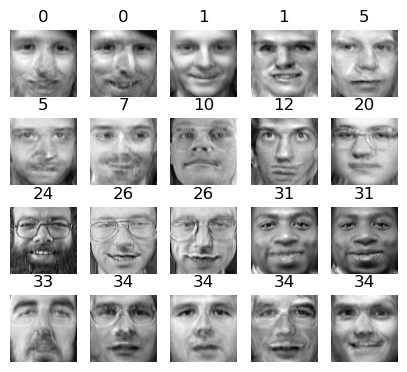

In [53]:
plot_faces(gen_faces, y_gen_faces)

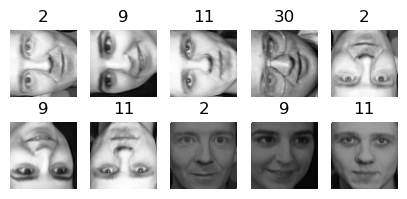

In [54]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [55]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [56]:
gm.score_samples(X_bad_faces_pca)

array([-37128614.61947165, -37275289.05452577, -57353581.89989293,
       -31213705.12422   , -39442113.85217103, -52138583.36191494,
       -52020880.60471021, -82638440.52773473, -86422336.23338068,
       -88148490.68498267])

In [57]:
gm.score_samples(X_train_pca[:10])

array([1055.22965979, 1074.46726599, 1109.71704869, 1105.45118926,
       1147.09884675, 1163.5948375 , 1140.45935032, 1140.45935022,
       1074.46726211, 1109.71704904])

Some dimensionality reduction techniques can also be used for anomaly detection.
For example, take the Olivetti faces dataset and reduce it with PCA, preserving
99% of the variance. Then compute the reconstruction error for each image.
Next, take some of the modified images you built in the previous exercise, and
look at their reconstruction error: notice how much larger the reconstruction
error is. If you plot a reconstructed image, you will see why: it tries to reconstruct
a normal face.

In [58]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [59]:
reconstruction_errors(pca, X_train).mean()

0.00019231801

In [60]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0056932746

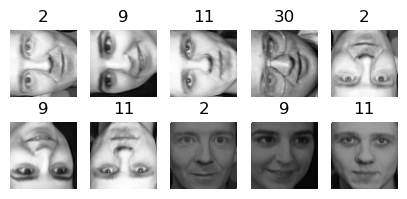

In [61]:
plot_faces(X_bad_faces, y_bad)

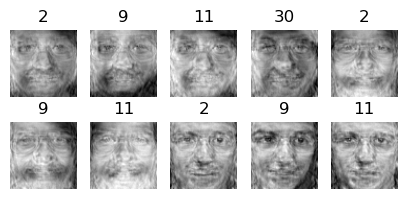

In [62]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)